In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 48.4 MB/s eta 0:00:0000:010:01
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 32.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for lxml: filename=lxml-4.9.0-cp39-cp39-macosx_11_0_arm64.whl size=1441904 sha256=5252fb71e1e09ba4bafbb8211325df0aac4b397c720bce9d7b657b53873b1820
  Stored in directory: /Users/zachzobair/Library/Caches/pip/wheels/51/e7/8f/449fb7c30cec16495fa25330c905328f89d27c4e3c0306c418
Successfully built lxml


In [3]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
# Get stock quote
df = web.DataReader('VTSAX', data_source='yahoo', start='2012-01-01', end='2022-06-28')
# Show Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,31.770000,31.770000,31.770000,31.770000,0.0,26.315254
2012-01-04,31.760000,31.760000,31.760000,31.760000,0.0,26.306971
2012-01-05,31.879999,31.879999,31.879999,31.879999,0.0,26.406364
2012-01-06,31.820000,31.820000,31.820000,31.820000,0.0,26.356676
2012-01-09,31.910000,31.910000,31.910000,31.910000,0.0,26.431215
...,...,...,...,...,...,...
2022-06-22,91.099998,91.099998,91.099998,91.099998,0.0,91.099998
2022-06-23,92.099998,92.099998,92.099998,92.099998,0.0,92.099998
2022-06-24,94.970001,94.970001,94.970001,94.970001,0.0,94.970001


In [5]:
df.shape

(2639, 6)

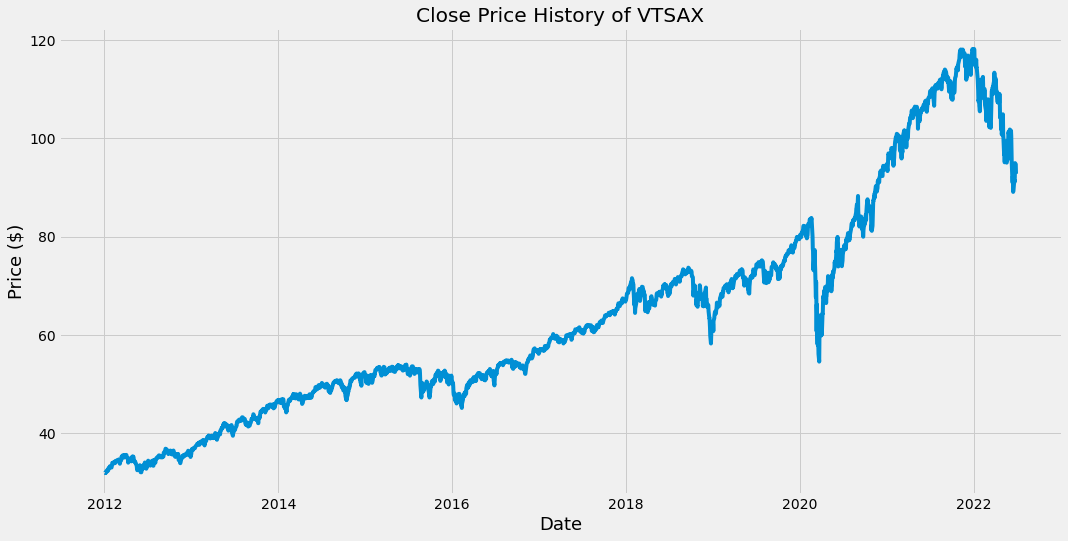

In [6]:
# Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History of VTSAX')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price ($)', fontsize=18)
plt.show()

In [7]:
# filtering the data
data = df.filter(['Close'])
dataset = data.values

training_data_len = math.ceil(len(dataset) * 0.8)
print(training_data_len)

2112


In [8]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.15622950e-04],
       [0.00000000e+00],
       [1.38743129e-03],
       ...,
       [7.30835948e-01],
       [7.27829796e-01],
       [7.05746364e-01]])

In [9]:
# Creating the training data
train_data = scaled_data[0:training_data_len, :]
# Split data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00011562, 0.        , 0.00138743, 0.00069372, 0.0017343 ,
       0.00531855, 0.00578099, 0.00670598, 0.00485605, 0.00601224,
       0.01063707, 0.01260259, 0.01283384, 0.01294948, 0.01294948,
       0.01653368, 0.01433691, 0.01433691, 0.01318073, 0.01306508,
       0.01722742, 0.01792116, 0.02393342, 0.02370218, 0.02439587,
       0.02532085, 0.02578334, 0.02277719, 0.02578334, 0.02532085,
       0.02347093, 0.02821136, 0.02890505, 0.02867385, 0.02717078,
       0.02948319, 0.03006128, 0.03040813, 0.03144871, 0.02925194,
       0.03191121, 0.03006128, 0.02855821, 0.02208345, 0.02520521,
       0.02936755, 0.03121747, 0.03098622, 0.03838596, 0.03746098,
       0.04012024, 0.04046708, 0.04220141, 0.04058273, 0.04000464,
       0.03688288, 0.03665164, 0.04243265, 0.04104522, 0.03907965])]
[0.038501560093864795]

[array([0.00011562, 0.        , 0.00138743, 0.00069372, 0.0017343 ,
       0.00531855, 0.00578099, 0.00670598, 0.00485605, 0.00601224,
       0.01063707, 0.01260259, 0.0

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2052, 60, 1)

In [11]:
# Building LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [36]:
# Training the Model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2052/2052 [==============================] - 20s 10ms/step - loss: 1.6239e-04 - accuracy: 0.0000e+00
Epoch 2/5
2052/2052 [==============================] - 20s 10ms/step - loss: 1.5232e-04 - accuracy: 0.0000e+00
Epoch 3/5
2052/2052 [==============================] - 21s 10ms/step - loss: 1.3504e-04 - accuracy: 0.0000e+00
Epoch 4/5
2052/2052 [==============================] - 19s 9ms/step - loss: 1.1955e-04 - accuracy: 0.0000e+00
Epoch 5/5
2052/2052 [==============================] - 19s 9ms/step - loss: 1.2727e-04 - accuracy: 0.0000e+00


In [37]:
# Create testing dataset
test_data = scaled_data[training_data_len-60: , :]

# Create the datasets x_test, y_test
x_test = []
y_test = dataset[training_data_len: , :] # Values for the model to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [38]:
# Convert data to numpy array
x_test = np.array(x_test)

In [39]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [40]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # Unscaling the values

In [41]:
# Calculate the RMSE of the model
rmse = np.sqrt(np.mean(((predictions-y_test) ** 2)))
rmse

1.538293870284049

/var/folders/zt/76_cpw7j6d1f9hnvml9lrj6m0000gn/T/ipykernel_74040/4092844992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


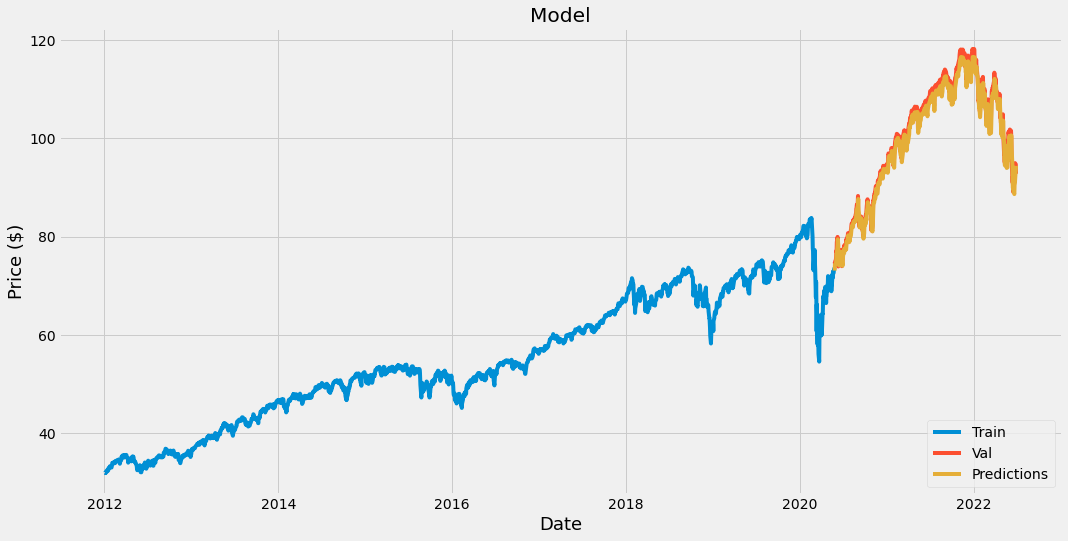

In [42]:
# Plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [43]:
# Show the actual and predicted prices
valid

,Close,Predictions
Date,,
2020-05-27,74.800003,73.048676
2020-05-28,74.529999,74.273598
2020-05-29,74.889999,74.323997
2020-06-01,75.290001,74.436684
2020-06-02,75.919998,74.806870
...,...,...
2022-06-22,91.099998,90.500595
2022-06-23,92.099998,90.783203
2022-06-24,94.970001,91.386353


In [45]:
# Predicting a further price using this model
new_df = df.filter(['Close'])
prev_60_days = new_df[-60:].values
prev_60_days = scaler.fit_transform(prev_60_days)

X_test = [prev_60_days]
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price) # printing the predicted price for Jun 29th

[[93.005005]]


In [47]:
vtsax_quote_actual = web.DataReader('VTSAX', data_source='yahoo', start='2022-06-29', end='2022-06-29')
print(vtsax_quote_actual['Close'])

Date
2022-06-29    92.610001
Name: Close, dtype: float64
